In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pymoab import core, types
from pymoab.rng import Range
import generate_stats as gs

ModuleNotFoundError: No module named 'numpy'

# TYPE FILENAME BELOW

In [19]:
input_file = 'tests/single-cube.h5m'

In [20]:
my_core = core.Core()
my_core.load_file(input_file) #loads input file

In [21]:
root_set = my_core.get_root_set()
display_options = {'NR':True, 'ER':True, 'SPV':True, 'TPS':True, 'TPV':True, 
                   'TAR':True, 'SPV_data':False, 'TPS_data':False}
tar_meshset = root_set 

In [22]:
stats, data = gs.collect_statistics(my_core, root_set, tar_meshset, display_options)
#collects statistics for each of the statistical areas to be used for the PDFs

In [23]:
def show_data(data):
    #calls each PDF to be made
    spv_hist(np.array(list(data['S_P_V'].values())))
    tps_hist(np.array(list(data['T_P_S'].values())))
    tpv_hist(np.array(data['T_P_V']))
    tar_hist(np.array(data['T_A_R']))
    ta_hist()
    c_hist()
    r_hist()

In [29]:
def spv_hist(spv_data):
    # Creates a PDF with the surfaces per volume data
    fig, ax = plt.subplots()
    bins = [0,1]
    x = 2
    while x < max(spv_data):
        bins.append(x)
        x = x*2
    bins.append(bins[-1]*2)
    plt.hist(spv_data, bins = bins)
    ax.set_title('Surfaces per Volume')
    ax.set_xlabel('Surfaces')
    ax.set_ylabel('Occurences')
    ax.set_xticks(bins)

In [30]:
def tps_hist(tps_data):
    # Creates a PDF with the triangles per surface data
    bins = [0,1]
    x = 2
    while x < max(tps_data):
        bins.append(x)
        x = x*2
    bins.append(bins[-1]*2)
    fig, ax = plt.subplots()
    plt.hist(tps_data)
    ax.set_title('Triangles per Surface')
    ax.set_xlabel('Triangles')
    ax.set_ylabel('Occurences')
    ax.set_xticks(bins)

In [37]:
def tpv_hist(tpv_data):
    # Creates a PDF with triangles per vertex data
    bins = [0,1]
    x = 10
    while x < max(tpv_data):
        bins.append(x)
        x = x*10
    bins.append(bins[-1]*2)
    fig, ax = plt.subplots()
    plt.hist(tpv_data)
    ax.set_title('Triangles per Vertex')
    ax.set_xlabel('Triangles')
    ax.set_ylabel('Occurences')

In [38]:
def tar_hist(tar_data):
    # Creates a PDF with triangle aspect ratio data
    bins = [0,1]
    x = 10
    while x < max(tar_data):
        bins.append(x)
        x = x*10
    bins.append(bins[-1]*2)
    fig, ax = plt.subplots()
    plt.hist(tar_data)
    ax.set_title('Triangle Aspect Ratio')
    ax.set_xlabel('Ratio')
    ax.set_ylabel('Occurences')

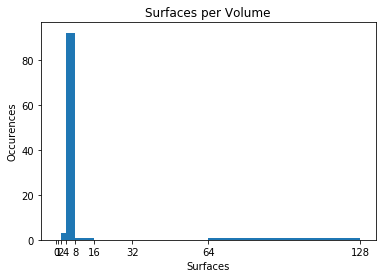

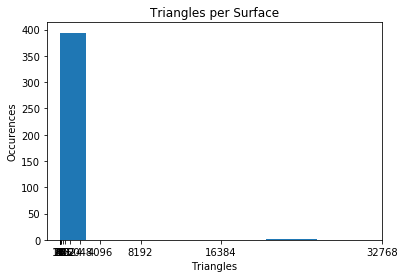

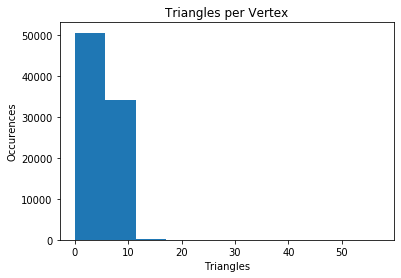

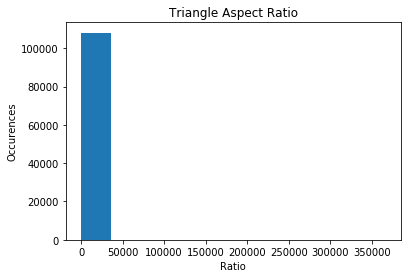

In [39]:
show_data(data)